In [1]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import scipy

In [2]:
hs = pd.read_csv(r'C:\Users\Tom\Downloads\HighSchool.csv')
hs = hs.drop(['SL No.'], axis=1)
for x in range(len(hs)):
    hs.Result= (hs.Result-hs.Result.min())/(hs.Result.max()-hs.Result.min())*100
hs

,Gender,Race,Parental_Education,TestPrep_Course,Special_Coaching,Attendance,DailyStudy_Hours,Result
0,Female,Asian,Attended college,None,No,85.0,16.0,57.894737
1,Female,African American,Attended college,Completed,Yes,89.0,12.0,85.964912
2,Female,Asian,Master Degree,None,Yes,94.0,17.5,94.736842
3,Male,American,Associate Degree,None,No,65.0,10.0,45.614035
4,Male,African American,Attended college,None,No,80.0,13.0,64.912281
...,...,...,...,...,...,...,...,...
293,Female,Others,Bachelor Degree,None,No,78.0,16.0,56.140351
294,Male,Hispanic,High school,Completed,No,73.0,12.0,63.157895
295,Male,Asian,Associate Degree,None,No,59.0,15.5,36.842105
296,Male,American,High school,Completed,No,70.0,14.0,15.789474


In [3]:
hs = hs.replace('Female', 1)
hs = hs.replace('Male', 2)
hs = hs.replace('None', 1)
hs = hs.replace('Completed', 2)
hs = hs.replace('No', 1)
hs = hs.replace('Yes', 2)
hs = hs.replace('Asian', 1)
hs = hs.replace('African American', 2)
hs = hs.replace('American', 3)
hs = hs.replace('Hispanic', 4)
hs = hs.replace('Others', 5)
hs = hs.replace('High school', 1)
hs = hs.replace('Attended college', 2)
hs = hs.replace('Associate Degree', 3)
hs = hs.replace('Bachelor Degree', 4)
hs = hs.replace('Master Degree', 5)
hs

,Gender,Race,Parental_Education,TestPrep_Course,Special_Coaching,Attendance,DailyStudy_Hours,Result
0,1,1,2,1.0,1.0,85.0,16.0,57.894737
1,1,2,2,2.0,2.0,89.0,12.0,85.964912
2,1,1,5,1.0,2.0,94.0,17.5,94.736842
3,2,3,3,1.0,1.0,65.0,10.0,45.614035
4,2,2,2,1.0,1.0,80.0,13.0,64.912281
...,...,...,...,...,...,...,...,...
293,1,5,4,1.0,1.0,78.0,16.0,56.140351
294,2,4,1,2.0,1.0,73.0,12.0,63.157895
295,2,1,3,1.0,1.0,59.0,15.5,36.842105
296,2,3,1,2.0,1.0,70.0,14.0,15.789474


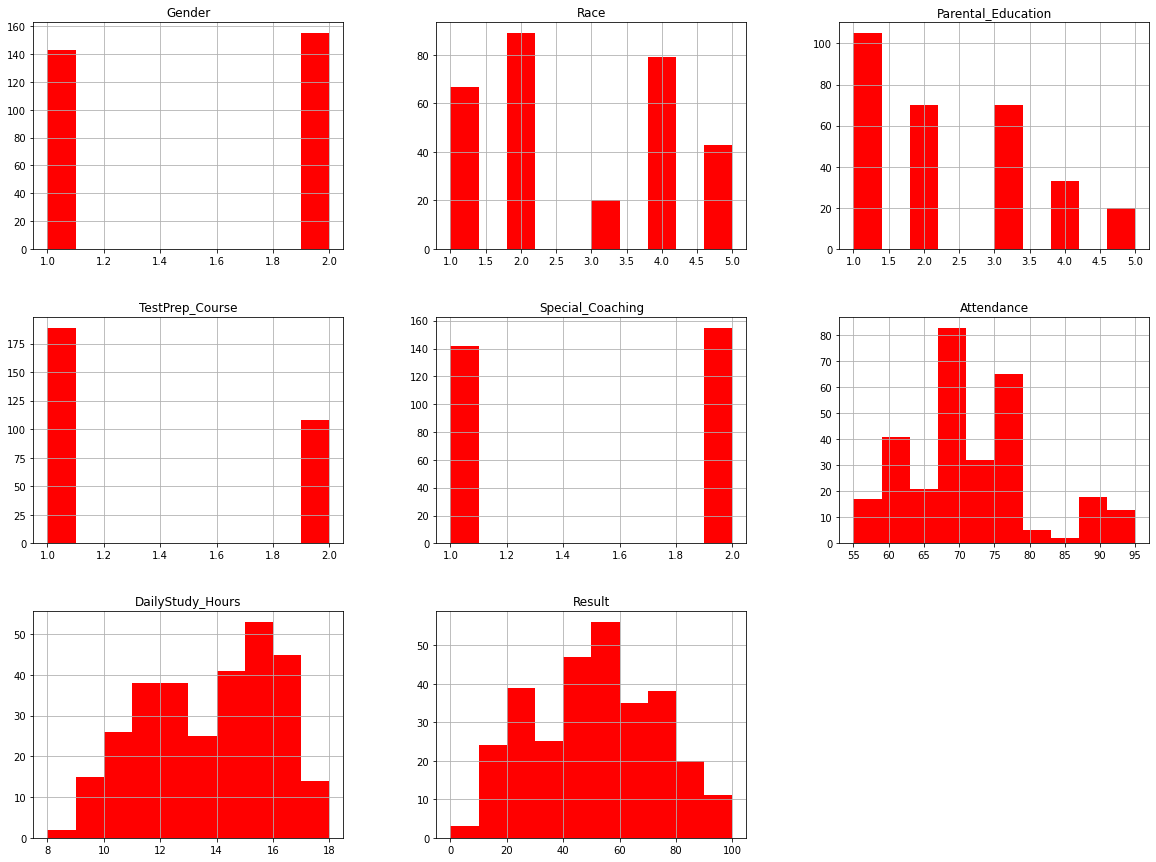

In [4]:
hs.hist(figsize=(20,15), color='r')
plt.show()

In [5]:
hs.Result.describe()

count    298.000000
mean      51.545390
std       22.239708
min        0.000000
25%       35.087719
50%       52.631579
75%       68.421053
max      100.000000
Name: Result, dtype: float64

In [6]:
#significance of gender on performance
print(hs['Result'][hs['Gender'] == 1].mean())
print(hs['Result'][hs['Gender'] == 2].mean())
stats.ttest_ind(hs['Result'][hs['Gender'] == 1],
                hs['Result'][hs['Gender'] == 2])

57.502146975831195
46.04980192416527


Ttest_indResult(statistic=4.588601425355186, pvalue=6.599359940638764e-06)

In [7]:
#significance of test prep on performance
print(hs['Result'][hs['TestPrep_Course'] == 1].mean())
print(hs['Result'][hs['TestPrep_Course'] == 2].mean())
stats.ttest_ind(hs['Result'][hs['TestPrep_Course'] == 1],
                hs['Result'][hs['TestPrep_Course'] == 2])

47.11779448621554
59.44606887589348


Ttest_indResult(statistic=-4.756865539327335, pvalue=3.0813497044964337e-06)

In [17]:
#significance of extreme parental education on performance
print(hs['Result'][hs['Parental_Education'] == 1].mean())
print(hs['Result'][hs['Parental_Education'] == 5].mean())
stats.ttest_ind(hs['Result'][hs['Parental_Education'] == 1],
                hs['Result'][hs['Parental_Education'] == 5])

46.78362573099415
60.877192982456144


Ttest_indResult(statistic=-2.5233529922136926, pvalue=0.012899066393626016)

In [9]:
#significance of special coaching on performance
print(hs['Result'][hs['Special_Coaching'] == 1].mean())
print(hs['Result'][hs['Special_Coaching'] == 2].mean())
stats.ttest_ind(hs['Result'][hs['Special_Coaching'] == 1],
                hs['Result'][hs['Special_Coaching'] == 2])

51.49493451939712
51.607243916242226


Ttest_indResult(statistic=-0.043327305188261875, pvalue=0.965469936998338)

In [10]:
print(hs['Result'][hs['Race'] == 1].mean())
print(hs['Result'][hs['Race'] == 2].mean())
stats.ttest_ind(hs['Result'][hs['Race'] == 2],
                hs['Result'][hs['Race'] == 3])

53.115998952605395
51.96136408436824


Ttest_indResult(statistic=2.431033242475477, pvalue=0.016717556141669726)

In [11]:
#Correlating attendance and performance
data = hs[['Result','Attendance']]
correlation = data.corr(method='pearson')
print(correlation)

              Result  Attendance
Result      1.000000    0.124879
Attendance  0.124879    1.000000


In [12]:
#Correlating daily study and performance
data = hs[['Result','DailyStudy_Hours']]
correlation = data.corr(method='pearson')
print(correlation)

                    Result  DailyStudy_Hours
Result            1.000000         -0.001031
DailyStudy_Hours -0.001031          1.000000


In [13]:
#Correlating parent education and performance
data = hs[['Result','Parental_Education']]
correlation = data.corr(method='pearson')
print(correlation)

                      Result  Parental_Education
Result              1.000000            0.187725
Parental_Education  0.187725            1.000000


In [14]:
hs['Attendance'] = hs['Attendance'].apply(lambda x: 'Low' if x < 85 else 'High')
hs.Attendance.value_counts()
print(hs['Result'][hs['Attendance'] == 'High'].mean())
print(hs['Result'][hs['Attendance'] == 'Low'].mean())
stats.ttest_ind(hs['Result'][hs['Attendance'] == 'High'],
                hs['Result'][hs['Attendance'] == 'Low'])

57.78841041998936
50.76795762992382


Ttest_indResult(statistic=1.7156317278676523, pvalue=0.08727587595641922)

In [15]:
hs['DailyStudy_Hours'] = hs['DailyStudy_Hours'].apply(lambda x: 'Low' if x < 16 else 'High')
hs.DailyStudy_Hours.value_counts()
print(hs['Result'][hs['DailyStudy_Hours'] == 'High'].mean())
print(hs['Result'][hs['DailyStudy_Hours'] == 'Low'].mean())
stats.ttest_ind(hs['Result'][hs['DailyStudy_Hours'] == 'High'],
                hs['Result'][hs['DailyStudy_Hours'] == 'Low'])

52.309941520467824
51.352646321686514


Ttest_indResult(statistic=0.29751257333325704, pvalue=0.7662839042356125)